# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B ML Lab/W6/CLV.csv", index_col=0)


In [ ]:
df

,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
## define X, y
X = df.drop(['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

## scaling both input and output data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))   # single series should be reshaped 
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))     # single series should be reshaped 

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
# took 13 mins
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

clf = MLPRegressor()
params = {'hidden_layer_sizes': [(10,), (5,20,), (20,5,),(10,10,10,),(16,4,2,)],
          'activation': ['relu', 'tanh', 'logistic'],
          'alpha': [0.001, 0.01, 0.02]}
  
grid = GridSearchCV(clf, params, cv=5)
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters: {'activation': 'tanh', 'alpha': 0.02, 'hidden_layer_sizes': (20, 5)}
Best score: 0.5711817157565763


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
## train model
regressor = MLPRegressor(**grid.best_params_).fit(X_train, y_train)

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
y_pred_in = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

in_mse = mean_squared_error(y_train, y_pred_in)
out_mse = mean_squared_error(y_test, y_pred)
out_r2 = r2_score(y_test, y_pred)

print('In sample MSE:', in_mse)
print('Out of sample MSE:', out_mse)

In sample MSE: 0.35134353895433246
Out of sample MSE: 0.43956755034891626


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
## create architecture
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(5, activation ='tanh'))
model.add(Dense(1, activation='linear'))

## train model
model.compile(loss='mse', optimizer=Adam(lr=0.02))  # alpha 0.02
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.9619
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.8387
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5341
Epoch 4/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4827
Epoch 5/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4471
Epoch 6/100
200/200 [==============================] - 2s 8ms/step - loss: 0.4572
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4486
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4283
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4316
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4307
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4279
Epoch 12/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 13/100


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

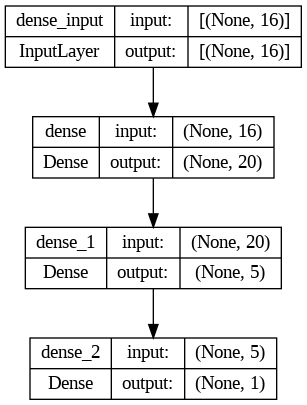

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


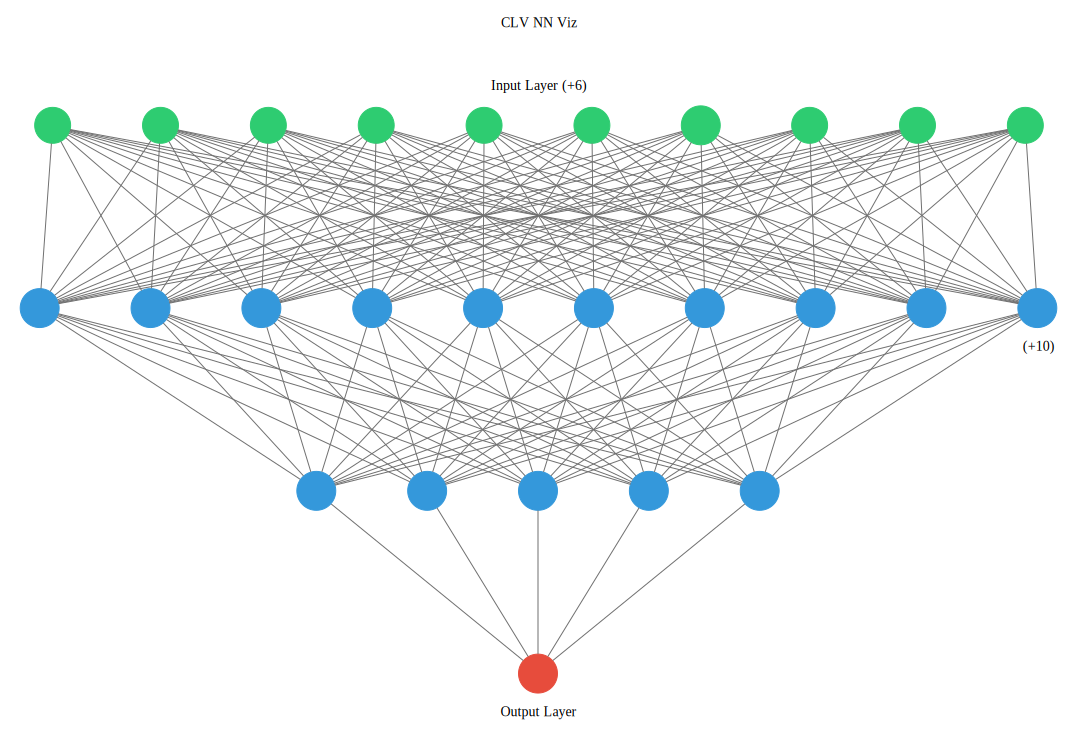

In [ ]:
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, title='CLV NN Viz', filename='CLV_Viz.gv')

# It doesn't automatically show the visualization!!
from graphviz import Source
Source.from_file('CLV_Viz.gv')